In [99]:
import numpy as np
import matplotlib.pyplot as plt
import random


In [100]:
def reset():
#     maze = np.array([
#     [0, 1, 0, 0, 0, 0, 0, 0],
#     [0, 1, 0, 1, 0, 1, 0, 0],
#     [0, 0, 0, 1, 1, 0, 1, 0],
#     [0, 1, 0, 1, 0, 0, 0, 0],
#     [1, 0, 0, 1, 0, 1, 0, 0],
#     [0, 0, 0, 1, 0, 1, 1, 1],
#     [0, 1, 1, 0, 0, 0, 0, 0],
#     [0, 0, 0, 0, 0, 1, 0, 0]
# ])
    maze = np.array([
        [0, 1, 0, 0],
        [0, 1, 0, 1],
        [0, 0, 0, 1],
        [0, 1, 0, 0],
    ])
    nrows, ncols = maze.shape
    start_cell= (0,0) # start_cell
    exit_cell=(nrows-1,ncols-1)
    time_limit=100
    return maze, nrows, ncols, start_cell,exit_cell,time_limit

maze, nrows, ncols, start_state,exit_state,time_limit=reset()
walls = np.argwhere(maze == 1)
actions = [up,down,left,right] = [0, 1, 2, 3]
nA=len(actions)
gamma=0.7
num_episodes=1000
epsilon=0.9

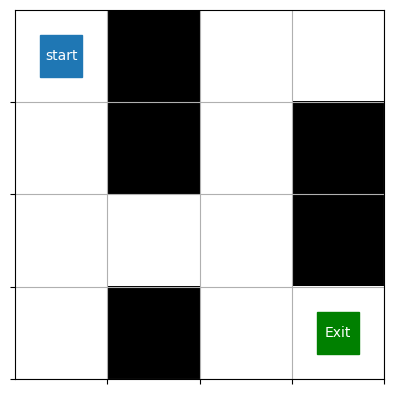

In [101]:
def maze_render():
    _, ax2 =plt.subplots()
    ax2.set_xticks(np.arange(0.5, nrows, step=1))
    ax2.set_xticklabels([])
    ax2.set_yticks(np.arange(0.5, ncols, step=1))
    ax2.set_yticklabels([])
    ax2.grid(True)

    ax2.plot(*reversed(start_state), "s", markersize=30)  
    ax2.text(*reversed(start_state), "start", ha="center", va="center", color="white")

    ax2.plot(*reversed(exit_state), "gs", markersize=30)  # exit is a big green square
    ax2.text(*reversed(exit_state), "Exit", ha="center", va="center", color="white")

    ax2.imshow(maze, cmap="binary")
    ax2.get_figure().canvas.draw()
maze_render()

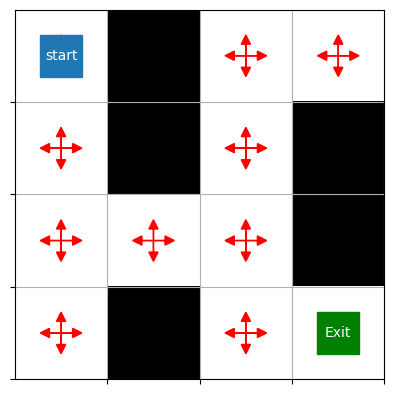

In [102]:
def render_policy(policy):
    _, ax2 =plt.subplots()
    ax2.set_xticks(np.arange(0.5, nrows, step=1))
    ax2.set_xticklabels([])
    ax2.set_yticks(np.arange(0.5, ncols, step=1))
    ax2.set_yticklabels([])
    ax2.grid(True)

    # "bs" -> blue square
    # "gs" -> green square
    ax2.plot(*start_state, "s", markersize=30)  
    ax2.text(*start_state, "start", ha="center", va="center", color="white")

    ax2.plot(*exit_state, "gs", markersize=30)  # exit is a big green square
    ax2.text(*exit_state, "Exit", ha="center", va="center", color="white")

    # render q-value
    free_cells = [(row, col)  for row in range(nrows) for col in range(ncols) if maze[row][col] == 0]
    
    for cell in free_cells:
        pi_a = policy[cell]
         
        a=[pi_a]if type(pi_a) is np.int64 else  np.nonzero(pi_a == np.max(pi_a))[0] # check if policy is deterministic or stochastic
        
        if type(policy[cell]) is np.int64:
            dx = 0
            dy = 0
            if policy[cell] == 0:
                dy = -0.2
            if policy[cell] == 1:
                dy = 0.2
            if policy[cell] == 2:
                dx = -0.2
            if policy[cell] == 3:
                dx = 0.2
            ax2.arrow(cell[1],cell[0], dx, dy, color="red", head_width=0.1, head_length=0.1)
        else:
            for (i,value) in enumerate(policy[cell]):
                dx = 0
                dy = 0
                if i == 0:
                    dy = -0.5*value
                if i == 1:
                    dy = 0.5*value
                if i == 2:
                    dx = -0.5*value
                if i == 3:
                    dx = 0.5*value

                # *cell are the starting coordinates of the arrow.
                # dx and dy are the arrow's length and direction.
                ax2.arrow(cell[1],cell[0], dx, dy, color="red", head_width=0.1, head_length=0.1)
                #actions = [up, down, left, right] = [0,1,2,3]
    ax2.imshow(maze, cmap="binary")
    ax2.get_figure().canvas.draw()


policy1=np.full((nrows,ncols,nA), 1/nA)
render_policy(policy1)

In [103]:
def render_value(V):
    plt.imshow(V, cmap='Greys')  
    for i in range(nrows):
        for j in range (ncols):
            plt.text(j, i, f'{V[i, j]}', ha='center', va='center', color='r', fontsize=10)
    plt.xticks([]) # Hide the x-axis values
    plt.yticks([]) # Hide the y-axis values
    plt.show() 


In [104]:
def isValideState(state):
    return state  in walls or state[0] < nrows and state[0] >= 0 and state[1] < ncols and state[1] >= 0

In [105]:
def move(state,action):
    if action == up:
        return (state[0]-1,state[1])
    if action == down:
        return (state[0]+1,state[1])
    if action == left:
        return (state[0],state[1]-1)
    if action == right:
        return (state[0],state[1]+1)

In [106]:
def getReward(state, action):
    new_state = move(state, action)
    if isValideState(new_state):
        return -10
    elif new_state == exit_state:
        return 50
    else:
        return -1

In [107]:
def step(state,action):
    """_summary_

    Args:
        state (_type_): (x,y)

    Returns:
        tuple: (next_state, reward, done)
    """
    newState = move(state, action)
    if isValideState(newState):
        nextState = state
    else:
        nextState = newState
    return nextState,getReward(state, action),nextState == exit_state

## First-Visit MC prediction for prediction

In [108]:
def displayAction(action):
    if action == up:
        print("↑",end="")
    elif action == down:
        print("↓",end="")
    elif action == left:
        print("←",end="")
    elif action == right:
        print("→",end="")
def displayTraj(trajectory):
    print("\nTrajectory : ",end="")
    for i in trajectory:
        displayAction(i[1])

In [109]:
def selectAction(state,policy):
    if random.uniform(0, 1) < epsilon:
        return random.choice(actions)
    else:
        return np.argmax(policy[state])

In [110]:
def getTrajectory(policy,initState=(0,0),showAction=False):
    """_summary_

    Args:
        policy : policy to follow
        initState: the initial state of the trajectory

    Returns:
        trajectory: list of tuple (nextState,action,reward)
    """
    state = initState if isValideState(initState) else (0,0)
    trajectory = []
    done = False
    time_step = 0
    while not done:
        action = selectAction(state,policy)
        time_step += 1
        if showAction:
            displayAction(action)
        nextState,reward,win = step(state,action)
        trajectory.append((state,action,reward))
        state = nextState
        done = win or time_limit == time_step
    return trajectory

In [111]:
traj = getTrajectory(policy1)
traj

IndexError: index -6 is out of bounds for axis 1 with size 4

In [112]:
def getFirstVisitReturn(trajectory,returns):
    """_summary_
    get return acording to the first visit monte carlo method
    Args:
        trajectory: state action newstate
        returns : dict of state and list of return

    Returns:
        the updated returns
    """
    G = 0
    for index,sar in enumerate(reversed(trajectory)):
        s,a,r = sar
        G = r + gamma * G
        isFirstVisit = s not in [triple[0] for triple in trajectory[:-index-1]]
        if s not in returns and isFirstVisit:
            returns[s] = [G]
        elif isFirstVisit :
            returns[s].append(G)
    return returns

In [ ]:
a = [1,2,3,4]
a[:0]

[]

In [113]:
def monteCarloPolicyEvaluation(policy,numberEpisodes):
    value_function=np.zeros((nrows,ncols))
    returns = {}
    for i in range(numberEpisodes):
        trajectory = getTrajectory(policy)
        # getting the returns for each state
        returns = getFirstVisitReturn(trajectory,returns)
        
    # calculating the mean of the returns for each state which is the value function
    for i in range(nrows):
        for j in range (ncols):
            if (i,j) in returns:
                value_function[(i,j)] = np.round(np.mean(returns[(i,j)]), 2)  # rounds the  mean two decimal places
    return value_function

In [114]:
vf = monteCarloPolicyEvaluation(policy1,1000)

IndexError: index -5 is out of bounds for axis 1 with size 4

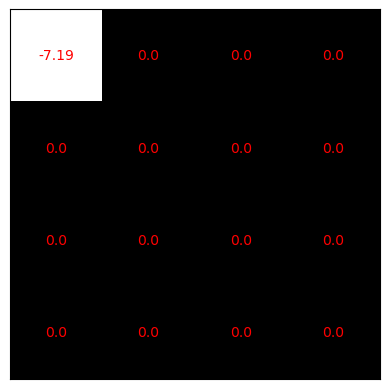

In [ ]:
render_value(vf)